# 📊 Projeto: Segmentação Inteligente de Clientes
### Datacorp AI Lab - Setor de Marketing  
**Professor:** Ms. Alex Lima  
**Disciplina:** Aprendizado de Máquina  
**Aluno:** Gabriel Scotto Sbrana

## 1. Introdução
**Objetivo:** Aplicar técnicas de machine learning não supervisionado (clustering) para segmentar clientes da Datacorp, permitindo campanhas de marketing personalizadas.

In [4]:
# 2. Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
# 3. Carregamento e visualização dos dados
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print("Shape do dataset:", df.shape)
df.head()

Shape do dataset: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# 4. Pré-processamento
from datetime import datetime
df['Age'] = datetime.now().year - df['Year_Birth']
colunas_remover = ['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer']
df.drop(columns=colunas_remover, inplace=True)
df.dropna(inplace=True)

In [7]:
# 5. Seleção e normalização das variáveis
features = ['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

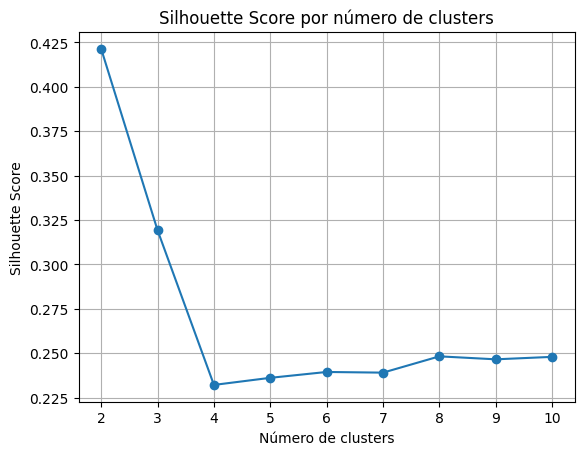

In [8]:
# 6. Encontrando o número ideal de clusters
scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)

plt.plot(k_range, scores, marker='o')
plt.title('Silhouette Score por número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [9]:
# 7. Aplicando K-Means com k definido (ex: k=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

Resumo dos clusters:

               Income        Age    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                    
0        34174.295181  47.893976   62.965060   6.424096        31.818072   
1        46697.822736  67.406551  172.724470   8.105973        51.242775   
2        74312.225610  55.146341  512.628049  92.493902       438.817073   
3        71993.810761  58.756957  679.102041  34.374768       321.200371   

         MntFishProducts  MntSweetProducts  MntGoldProds  
Cluster                                                   
0               9.200000          6.402410     20.457831  
1              12.364162          8.339114     24.175337  
2             132.557927         97.057927     91.628049  
3              48.001855         34.172542     70.215213  


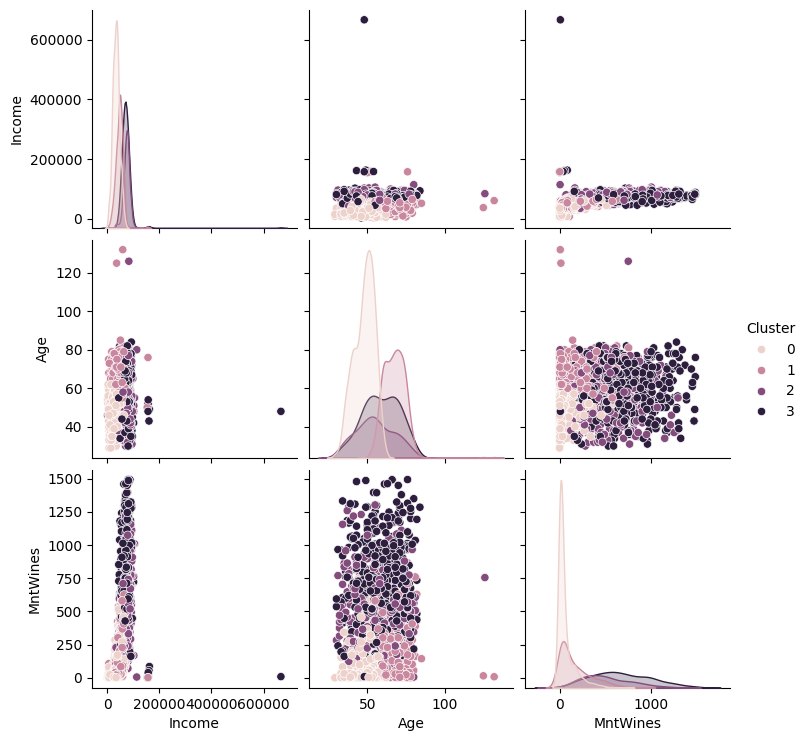

In [10]:
# 8. Análise dos clusters
cluster_summary = df.groupby('Cluster')[features].mean()
print("Resumo dos clusters:\n")
print(cluster_summary)

sns.pairplot(df, hue='Cluster', vars=['Income', 'Age', 'MntWines'])
plt.show()

## 9. Conclusão
- Cada cluster representa um perfil distinto de cliente
- Permite campanhas personalizadas e mais eficientes
- Pode aumentar conversão, engajamento e reduzir custos de marketing

**Próximos passos:**
- Incluir variáveis comportamentais
- Aplicar PCA para visualização em 2D

## 10. Dicionário de Dados
- `Income`: Renda anual
- `Age`: Idade estimada
- `MntWines`: Gasto com vinhos
- `MntFruits`: Gasto com frutas
- `MntMeatProducts`: Gasto com carnes
- `MntFishProducts`: Gasto com peixes
- `MntSweetProducts`: Gasto com doces
- `MntGoldProds`: Gasto com produtos premium
- `Cluster`: Grupo atribuído pelo modelo K-Means